In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(842424)

In [3]:
nSamples = 1000
inputDim = 2
outputDim = 1

In [20]:
batchSize = 50
nEpochs = 1000

In [5]:
x1 = np.random.normal(1., 0.25, (nSamples//2, inputDim))
x2 = np.random.normal(2., 0.30, (nSamples//2, inputDim))
y1 = np.zeros(nSamples//2)
y2 = np.ones(nSamples//2)
x = np.concatenate((x1, x2))
y = np.concatenate((y1, y2))

In [6]:
shuffled = np.arange(nSamples)
np.random.shuffle(shuffled)
xs = x[shuffled]
ys = y[shuffled]

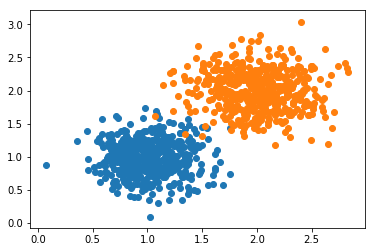

In [7]:
plt.scatter(*zip(*x1))
plt.scatter(*zip(*x2))

In [8]:
def activation(z):
    return 1 / (1 + np.exp(-z))

In [9]:
def lr_predict(weights, x_b):
    return activation(np.dot(x_b, weights))

In [10]:
def lr_loss(weights, x_b, label):
    loss = 0.
    inputDim = x.shape[0]
    grad = np.zeros(inputDim + 1)
    
    y = lr_predict(weights, x_b)
    
    loss = (y - label)**2 / 2
    
    grad = -(y - label) * y**2 * np.exp(-np.dot(weights, x_b)) * x_b
    
    return loss, grad

In [28]:
def lr_train(x, labels, nEpochs, lr=0.01):
    weights = np.zeros(x.shape[1]+1)
    x_b = np.hstack((np.ones((x.shape[0], 1)), x))    
    for epoch in range(nEpochs):
        sumloss = 0.
        for n in range(nSamples):
            loss, grad = lr_loss(weights, x_b[n], labels[n])
            sumloss += loss
            weights += lr * grad
        sumloss /= nSamples
        if epoch % 100 == 0:
            print(epoch, sumloss)
    return weights

In [29]:
weights = lr_train(xs, ys, nEpochs)

0 0.1125483507813009
100 0.010764652283381138
200 0.007358035721911245
300 0.0060717388732477555
400 0.005370051091487106
500 0.004919360039885603
600 0.004601561633575005
700 0.004363474363003188
800 0.00417735294863093
900 0.004027194766247022


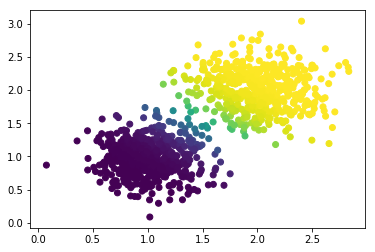

In [25]:
plt.scatter(*zip(*xs), c=[lr_predict(weights, x) for x in np.hstack((np.ones((x.shape[0], 1)), xs))])

In [14]:
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD

Using TensorFlow backend.


In [15]:
model = Sequential()
model.add(Dense(outputDim, input_dim=inputDim, activation='sigmoid'))

In [16]:
sgd = SGD(lr=0.05, decay=1e-6, momentum=0.9)
model.compile(optimizer='sgd', loss='mse', metrics=['accuracy'])

In [21]:
fit = model.fit(xs, ys, batch_size=batchSize, epochs=nEpochs)

Epoch 1/1000
1000/1000 [==============================] - 0s 16us/step - loss: 0.1539 - acc: 0.8510
Epoch 2/1000
1000/1000 [==============================] - 0s 14us/step - loss: 0.1534 - acc: 0.8520
Epoch 3/1000
1000/1000 [==============================] - 0s 16us/step - loss: 0.1529 - acc: 0.8550
Epoch 4/1000
1000/1000 [==============================] - 0s 14us/step - loss: 0.1524 - acc: 0.8590
Epoch 5/1000
1000/1000 [==============================] - 0s 13us/step - loss: 0.1519 - acc: 0.8600
Epoch 6/1000
1000/1000 [==============================] - 0s 16us/step - loss: 0.1514 - acc: 0.8630
Epoch 7/1000
1000/1000 [==============================] - 0s 19us/step - loss: 0.1510 - acc: 0.8650
Epoch 8/1000
1000/1000 [==============================] - 0s 15us/step - loss: 0.1505 - acc: 0.8640
Epoch 9/1000
1000/1000 [==============================] - 0s 17us/step - loss: 0.1500 - acc: 0.8680
Epoch 10/1000
1000/1000 [==============================] - 0s 16us/step - loss: 0.1495 - acc: 0.8710

1000/1000 [==============================] - 0s 16us/step - loss: 0.1206 - acc: 0.9590
Epoch 83/1000
1000/1000 [==============================] - 0s 16us/step - loss: 0.1202 - acc: 0.9600
Epoch 84/1000
1000/1000 [==============================] - 0s 15us/step - loss: 0.1199 - acc: 0.9610
Epoch 85/1000
1000/1000 [==============================] - 0s 17us/step - loss: 0.1196 - acc: 0.9610
Epoch 86/1000
1000/1000 [==============================] - 0s 18us/step - loss: 0.1193 - acc: 0.9610
Epoch 87/1000
1000/1000 [==============================] - 0s 16us/step - loss: 0.1189 - acc: 0.9610
Epoch 88/1000
1000/1000 [==============================] - 0s 16us/step - loss: 0.1186 - acc: 0.9610
Epoch 89/1000
1000/1000 [==============================] - 0s 16us/step - loss: 0.1183 - acc: 0.9610
Epoch 90/1000
1000/1000 [==============================] - 0s 17us/step - loss: 0.1180 - acc: 0.9610
Epoch 91/1000
1000/1000 [==============================] - 0s 17us/step - loss: 0.1176 - acc: 0.9620
Epoc

1000/1000 [==============================] - 0s 14us/step - loss: 0.0985 - acc: 0.9760
Epoch 163/1000
1000/1000 [==============================] - 0s 16us/step - loss: 0.0983 - acc: 0.9760
Epoch 164/1000
1000/1000 [==============================] - 0s 15us/step - loss: 0.0980 - acc: 0.9760
Epoch 165/1000
1000/1000 [==============================] - 0s 15us/step - loss: 0.0978 - acc: 0.9770
Epoch 166/1000
1000/1000 [==============================] - 0s 16us/step - loss: 0.0976 - acc: 0.9770
Epoch 167/1000
1000/1000 [==============================] - 0s 19us/step - loss: 0.0974 - acc: 0.9770
Epoch 168/1000
1000/1000 [==============================] - 0s 18us/step - loss: 0.0971 - acc: 0.9770
Epoch 169/1000
1000/1000 [==============================] - 0s 16us/step - loss: 0.0969 - acc: 0.9780
Epoch 170/1000
1000/1000 [==============================] - 0s 16us/step - loss: 0.0967 - acc: 0.9770
Epoch 171/1000
1000/1000 [==============================] - 0s 16us/step - loss: 0.0965 - acc: 0.

1000/1000 [==============================] - 0s 14us/step - loss: 0.0832 - acc: 0.9830
Epoch 243/1000
1000/1000 [==============================] - 0s 14us/step - loss: 0.0830 - acc: 0.9830
Epoch 244/1000
1000/1000 [==============================] - 0s 14us/step - loss: 0.0828 - acc: 0.9830
Epoch 245/1000
1000/1000 [==============================] - 0s 15us/step - loss: 0.0827 - acc: 0.9830
Epoch 246/1000
1000/1000 [==============================] - 0s 17us/step - loss: 0.0825 - acc: 0.9830
Epoch 247/1000
1000/1000 [==============================] - 0s 18us/step - loss: 0.0824 - acc: 0.9830
Epoch 248/1000
1000/1000 [==============================] - 0s 16us/step - loss: 0.0822 - acc: 0.9830
Epoch 249/1000
1000/1000 [==============================] - 0s 15us/step - loss: 0.0821 - acc: 0.9830
Epoch 250/1000
1000/1000 [==============================] - 0s 14us/step - loss: 0.0819 - acc: 0.9830
Epoch 251/1000
1000/1000 [==============================] - 0s 18us/step - loss: 0.0817 - acc: 0.

1000/1000 [==============================] - 0s 15us/step - loss: 0.0721 - acc: 0.9850
Epoch 323/1000
1000/1000 [==============================] - 0s 15us/step - loss: 0.0720 - acc: 0.9850
Epoch 324/1000
1000/1000 [==============================] - 0s 20us/step - loss: 0.0719 - acc: 0.9850
Epoch 325/1000
1000/1000 [==============================] - 0s 17us/step - loss: 0.0717 - acc: 0.9850
Epoch 326/1000
1000/1000 [==============================] - 0s 16us/step - loss: 0.0716 - acc: 0.9850
Epoch 327/1000
1000/1000 [==============================] - 0s 16us/step - loss: 0.0715 - acc: 0.9850
Epoch 328/1000
1000/1000 [==============================] - 0s 14us/step - loss: 0.0714 - acc: 0.9850
Epoch 329/1000
1000/1000 [==============================] - 0s 18us/step - loss: 0.0713 - acc: 0.9850
Epoch 330/1000
1000/1000 [==============================] - 0s 16us/step - loss: 0.0712 - acc: 0.9850
Epoch 331/1000
1000/1000 [==============================] - 0s 16us/step - loss: 0.0711 - acc: 0.

1000/1000 [==============================] - 0s 15us/step - loss: 0.0638 - acc: 0.9880
Epoch 403/1000
1000/1000 [==============================] - 0s 17us/step - loss: 0.0637 - acc: 0.9880
Epoch 404/1000
1000/1000 [==============================] - 0s 15us/step - loss: 0.0637 - acc: 0.9880
Epoch 405/1000
1000/1000 [==============================] - 0s 14us/step - loss: 0.0636 - acc: 0.9880
Epoch 406/1000
1000/1000 [==============================] - 0s 14us/step - loss: 0.0635 - acc: 0.9880
Epoch 407/1000
1000/1000 [==============================] - 0s 18us/step - loss: 0.0634 - acc: 0.9880
Epoch 408/1000
1000/1000 [==============================] - 0s 17us/step - loss: 0.0633 - acc: 0.9890
Epoch 409/1000
1000/1000 [==============================] - 0s 15us/step - loss: 0.0632 - acc: 0.9890
Epoch 410/1000
1000/1000 [==============================] - 0s 15us/step - loss: 0.0631 - acc: 0.9890
Epoch 411/1000
1000/1000 [==============================] - 0s 15us/step - loss: 0.0630 - acc: 0.

1000/1000 [==============================] - 0s 15us/step - loss: 0.0574 - acc: 0.9890
Epoch 483/1000
1000/1000 [==============================] - 0s 16us/step - loss: 0.0574 - acc: 0.9890
Epoch 484/1000
1000/1000 [==============================] - 0s 16us/step - loss: 0.0573 - acc: 0.9890
Epoch 485/1000
1000/1000 [==============================] - 0s 16us/step - loss: 0.0572 - acc: 0.9890
Epoch 486/1000
1000/1000 [==============================] - 0s 14us/step - loss: 0.0572 - acc: 0.9890
Epoch 487/1000
1000/1000 [==============================] - 0s 15us/step - loss: 0.0571 - acc: 0.9890
Epoch 488/1000
1000/1000 [==============================] - 0s 15us/step - loss: 0.0570 - acc: 0.9890
Epoch 489/1000
1000/1000 [==============================] - 0s 15us/step - loss: 0.0570 - acc: 0.9890
Epoch 490/1000
1000/1000 [==============================] - 0s 15us/step - loss: 0.0569 - acc: 0.9890
Epoch 491/1000
1000/1000 [==============================] - 0s 14us/step - loss: 0.0568 - acc: 0.

1000/1000 [==============================] - 0s 16us/step - loss: 0.0524 - acc: 0.9890
Epoch 563/1000
1000/1000 [==============================] - 0s 15us/step - loss: 0.0523 - acc: 0.9890
Epoch 564/1000
1000/1000 [==============================] - 0s 15us/step - loss: 0.0523 - acc: 0.9890
Epoch 565/1000
1000/1000 [==============================] - 0s 16us/step - loss: 0.0522 - acc: 0.9890
Epoch 566/1000
1000/1000 [==============================] - 0s 14us/step - loss: 0.0521 - acc: 0.9890
Epoch 567/1000
1000/1000 [==============================] - 0s 16us/step - loss: 0.0521 - acc: 0.9890
Epoch 568/1000
1000/1000 [==============================] - 0s 15us/step - loss: 0.0520 - acc: 0.9890
Epoch 569/1000
1000/1000 [==============================] - 0s 14us/step - loss: 0.0520 - acc: 0.9890
Epoch 570/1000
1000/1000 [==============================] - 0s 14us/step - loss: 0.0519 - acc: 0.9890
Epoch 571/1000
1000/1000 [==============================] - 0s 16us/step - loss: 0.0519 - acc: 0.

1000/1000 [==============================] - 0s 15us/step - loss: 0.0483 - acc: 0.9900
Epoch 643/1000
1000/1000 [==============================] - 0s 15us/step - loss: 0.0482 - acc: 0.9910
Epoch 644/1000
1000/1000 [==============================] - 0s 18us/step - loss: 0.0482 - acc: 0.9910
Epoch 645/1000
1000/1000 [==============================] - 0s 16us/step - loss: 0.0481 - acc: 0.9900
Epoch 646/1000
1000/1000 [==============================] - 0s 17us/step - loss: 0.0481 - acc: 0.9910
Epoch 647/1000
1000/1000 [==============================] - 0s 16us/step - loss: 0.0480 - acc: 0.9910
Epoch 648/1000
1000/1000 [==============================] - 0s 17us/step - loss: 0.0480 - acc: 0.9910
Epoch 649/1000
1000/1000 [==============================] - 0s 16us/step - loss: 0.0479 - acc: 0.9910
Epoch 650/1000
1000/1000 [==============================] - 0s 16us/step - loss: 0.0479 - acc: 0.9910
Epoch 651/1000
1000/1000 [==============================] - 0s 16us/step - loss: 0.0479 - acc: 0.

1000/1000 [==============================] - 0s 13us/step - loss: 0.0449 - acc: 0.9920
Epoch 723/1000
1000/1000 [==============================] - 0s 14us/step - loss: 0.0448 - acc: 0.9920
Epoch 724/1000
1000/1000 [==============================] - 0s 15us/step - loss: 0.0448 - acc: 0.9920
Epoch 725/1000
1000/1000 [==============================] - 0s 14us/step - loss: 0.0447 - acc: 0.9920
Epoch 726/1000
1000/1000 [==============================] - 0s 15us/step - loss: 0.0447 - acc: 0.9920
Epoch 727/1000
1000/1000 [==============================] - 0s 14us/step - loss: 0.0447 - acc: 0.9920
Epoch 728/1000
1000/1000 [==============================] - 0s 15us/step - loss: 0.0446 - acc: 0.9920
Epoch 729/1000
1000/1000 [==============================] - 0s 15us/step - loss: 0.0446 - acc: 0.9920
Epoch 730/1000
1000/1000 [==============================] - 0s 18us/step - loss: 0.0446 - acc: 0.9920
Epoch 731/1000
1000/1000 [==============================] - 0s 15us/step - loss: 0.0445 - acc: 0.

1000/1000 [==============================] - 0s 15us/step - loss: 0.0420 - acc: 0.9930
Epoch 803/1000
1000/1000 [==============================] - 0s 16us/step - loss: 0.0420 - acc: 0.9930
Epoch 804/1000
1000/1000 [==============================] - 0s 15us/step - loss: 0.0419 - acc: 0.9930
Epoch 805/1000
1000/1000 [==============================] - 0s 15us/step - loss: 0.0419 - acc: 0.9930
Epoch 806/1000
1000/1000 [==============================] - 0s 16us/step - loss: 0.0419 - acc: 0.9930
Epoch 807/1000
1000/1000 [==============================] - 0s 14us/step - loss: 0.0418 - acc: 0.9930
Epoch 808/1000
1000/1000 [==============================] - 0s 16us/step - loss: 0.0418 - acc: 0.9930
Epoch 809/1000
1000/1000 [==============================] - 0s 16us/step - loss: 0.0418 - acc: 0.9930
Epoch 810/1000
1000/1000 [==============================] - 0s 16us/step - loss: 0.0417 - acc: 0.9930
Epoch 811/1000
1000/1000 [==============================] - 0s 17us/step - loss: 0.0417 - acc: 0.

1000/1000 [==============================] - 0s 21us/step - loss: 0.0396 - acc: 0.9930
Epoch 883/1000
1000/1000 [==============================] - 0s 14us/step - loss: 0.0395 - acc: 0.9930
Epoch 884/1000
1000/1000 [==============================] - 0s 15us/step - loss: 0.0395 - acc: 0.9930
Epoch 885/1000
1000/1000 [==============================] - 0s 16us/step - loss: 0.0395 - acc: 0.9930
Epoch 886/1000
1000/1000 [==============================] - 0s 15us/step - loss: 0.0395 - acc: 0.9930
Epoch 887/1000
1000/1000 [==============================] - 0s 14us/step - loss: 0.0394 - acc: 0.9930
Epoch 888/1000
1000/1000 [==============================] - 0s 17us/step - loss: 0.0394 - acc: 0.9930
Epoch 889/1000
1000/1000 [==============================] - 0s 15us/step - loss: 0.0394 - acc: 0.9930
Epoch 890/1000
1000/1000 [==============================] - 0s 15us/step - loss: 0.0393 - acc: 0.9930
Epoch 891/1000
1000/1000 [==============================] - 0s 16us/step - loss: 0.0393 - acc: 0.

1000/1000 [==============================] - 0s 15us/step - loss: 0.0375 - acc: 0.9930
Epoch 963/1000
1000/1000 [==============================] - 0s 17us/step - loss: 0.0374 - acc: 0.9930
Epoch 964/1000
1000/1000 [==============================] - 0s 17us/step - loss: 0.0374 - acc: 0.9930
Epoch 965/1000
1000/1000 [==============================] - 0s 17us/step - loss: 0.0374 - acc: 0.9930
Epoch 966/1000
1000/1000 [==============================] - 0s 15us/step - loss: 0.0374 - acc: 0.9930
Epoch 967/1000
1000/1000 [==============================] - 0s 16us/step - loss: 0.0373 - acc: 0.9930
Epoch 968/1000
1000/1000 [==============================] - 0s 14us/step - loss: 0.0373 - acc: 0.9930
Epoch 969/1000
1000/1000 [==============================] - 0s 15us/step - loss: 0.0373 - acc: 0.9930
Epoch 970/1000
1000/1000 [==============================] - 0s 15us/step - loss: 0.0373 - acc: 0.9930
Epoch 971/1000
1000/1000 [==============================] - 0s 15us/step - loss: 0.0372 - acc: 0.

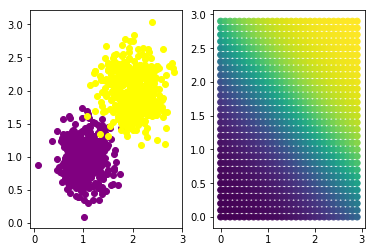

In [22]:
ls = np.zeros((30, 30))
ms = np.zeros((30, 30))
ns = np.zeros((30, 30))
for i in range(30):
    for j in range(30):
        ms[i, j] = i/10
        ns[i, j] = j/10
        ls[i, j] = model.predict(np.array([ms[i, j], ns[i, j]]).reshape((1, 2)))
ms.flatten()
ns.flatten()
ls.flatten()

fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.scatter(*zip(*x1), c='purple')
ax1.scatter(*zip(*x2), c='yellow')

ax2.scatter(ms, ns, c=ls)

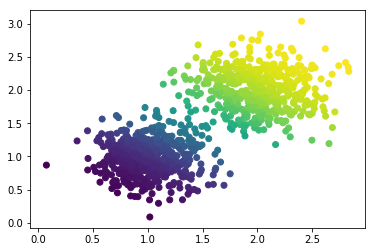

In [23]:
plt.scatter(*zip(*xs), c=model.predict(xs, batchSize).reshape(nSamples, ))